# Introduction to Machine Learning

In [2]:
from verticapy import *

In [4]:
from verticapy.connections import *
conn_info = {'host': '78.129.138.120',
             'port': '5433',
             'user': 'GAIVC',
             'password': 'GAIVC2021',
             'database': 'workshopdb'}

new_auto_connection(conn_info, name = 'workshop_db')
change_auto_connection('workshop_db')

When the data are prepared, one of the last stages of the Data Science Cycle is the Data Modeling. Machine Learning Algorithms are a set of statistical techniques which will use train data to build mathematical models. There are 2 main categories:
<ul class="ul_content">
 <li><b>Supervised</b> : these algorithms are used when we want to predict a response column.</li>
 <li><b>Unsupervised</b> : these algorithms are used when we want to detect anomalies or when we want to segment the data. No response column is needed.</li>
</ul>

Let's explain these two categories in detail. 

# Supervised Learning

Supervised Learning techniques are mapping an input to an output based on example. We can identify two main categories of Supervised Learning.
<ul class="ul_content">
 <li><b>Regression</b> : The Response is Numerical (Linear Regression, SVM Regression, RF Regression...)</li>
 <li><b>Classification</b> : The Response is Categorical (Gradient Boosting, Naive Bayes, Logistic Regression...)</li>
</ul>
 
For example, when we want to predict the total charges of a telco customer using his/her tenure is a Regression. The following code is drawing a Linear Regression model using the 'TotalCharges' as a function of the 'tenure' in the Telco Churn Dataset.

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅
4,0011-IGKFF,Male,1,✅,❌,13,✅,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,✅,Electronic check,98.0,1237.85,✅
5,0013-EXCHZ,Female,1,✅,❌,3,✅,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,✅,Mailed check,83.9,267.4,✅
6,0013-MHZWF,Female,0,❌,✅,9,✅,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,✅,Credit card (automatic),69.4,571.45,❌
7,0013-SMEOE,Female,1,✅,❌,71,✅,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Bank transfer (automatic),109.7,7904.25,❌
8,0014-BMAQU,Male,0,✅,❌,63,✅,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,✅,Credit card (automatic),84.65,5377.8,❌
9,0015-UOCOJ,Female,1,❌,❌,7,✅,No,DSL,Yes,No,No,No,No,No,Month-to-month,✅,Electronic check,48.2,340.35,❌
10,0016-QLJIS,Female,0,✅,✅,65,✅,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,✅,Mailed check,90.45,5957.9,❌

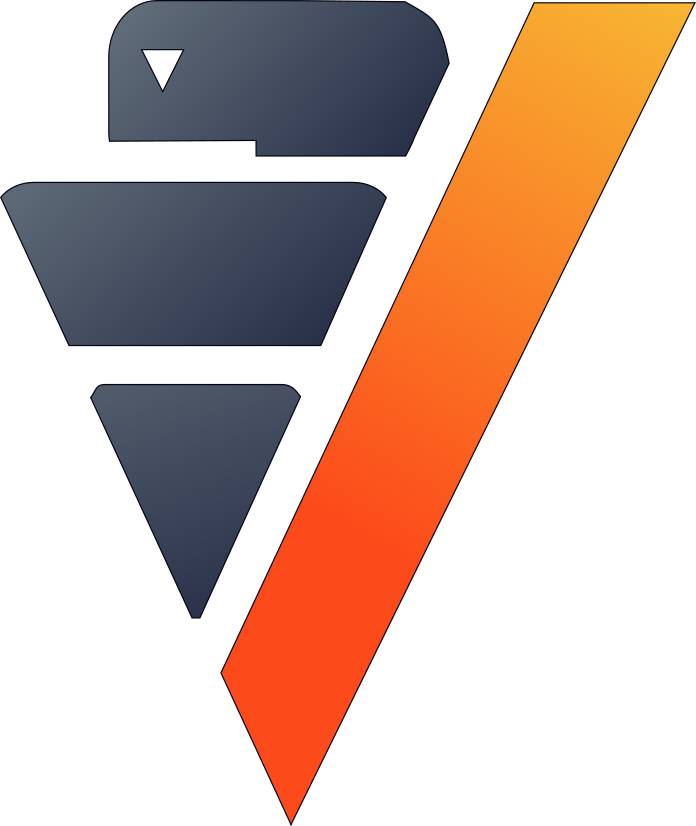

In [5]:
churn = vDataFrame('churn')
churn

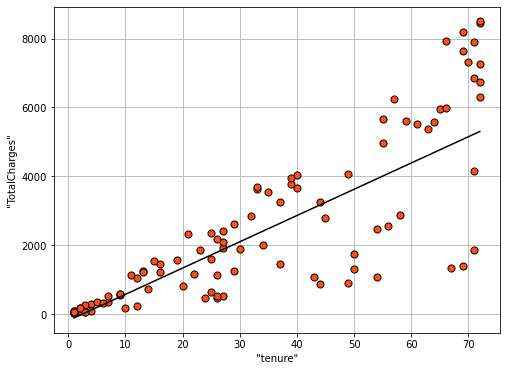

In [6]:
from verticapy.learn.linear_model import LinearRegression
from verticapy import *
model = LinearRegression("LR_churn")
model.drop()
model.fit("churn", ["tenure"], "TotalCharges")
model.plot()

When we have to predict a categorical column, we are dealing with classification. Let's see an example where we will use a Linear SVC to predict the flower specie using its Petal and Sepal Lengths. 

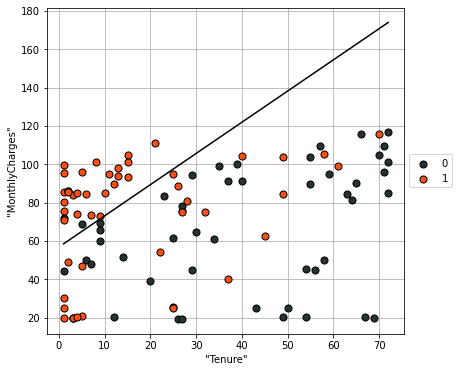

In [7]:
from verticapy.learn.svm import LinearSVC
model = LinearSVC("svc_churn")
model.drop()
model.fit("churn", ["Tenure", "MonthlyCharges"], "churn")
model.plot()

When the number of categories is greater than 2, we use the expression 'Multiclass Classification' instead of 'Classification'.

# Unsupervised Learning

These algorithms are to use to segment the data (KMeans, DBSCAN...) or to detect anomalies (Local Outlier Factor, Z-Score Techniques...). They are to use to find unknown patterns without pre-existing labels. For example, let's use a KMeans to create different clusters on the Smart Meters dataset. Each cluster will represent a region.

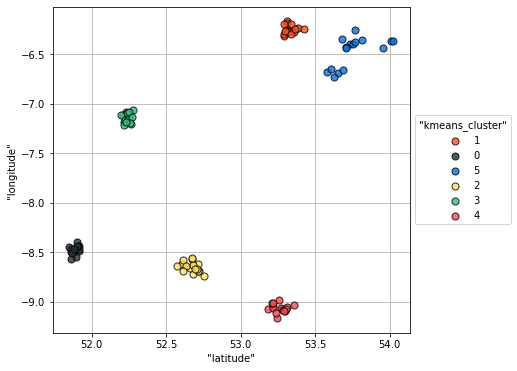

In [8]:
from verticapy.learn.cluster import KMeans
model = KMeans("KMeans_sm", n_cluster = 6)
model.drop()
model.fit("sm_meters", ["latitude", "longitude"])
model.plot()